# Quantitative Analysis

In this notebook we'll explore mainly quantitative features.

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
%run ./module_P2_utils.ipynb

In [3]:
df = pd.read_pickle("./tmp/df_01_cleaned.gzip")

## Univariate & Outliers analysis

In this section we detect and remove eventual Outliers contained in the dataset.

Outliers analysis is important to reduce the distribution of features, and then allow more precise analysis and predictions


In [4]:
quantis = df.select_dtypes('float').columns
quantis

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nova_group', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [5]:
modes = getMultiModes(df, quantis)
modes

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

All our features have only one mode, we may expect them to follow a normal distribution, but we need to analyse deeper

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
df[quantis].agg(agg_func).T

,std,skew,kurtosis,mean,median,var,mad,prod,sum
additives_n,2.00,4.17,24.10,0.74,0.00,4.01,1.17,0.00,"1,465,137.00"
ingredients_from_palm_oil_n,0.09,11.98,148.37,0.01,0.00,0.01,0.01,0.00,"14,652.00"
ingredients_that_may_be_from_palm_oil_n,0.19,9.15,108.20,0.03,0.00,0.03,0.05,0.00,"50,704.00"
nutriscore_score,8.84,0.10,-0.94,9.10,10.00,78.16,7.63,-0.00,"6,541,544.00"
nova_group,0.97,-1.65,1.43,3.42,4.00,0.95,0.77,inf,"2,156,897.00"
energy-kcal_100g,"6,168,468,420.38","1,409.26","1,986,208.99","4,421,061.51",159.00,"38,050,002,653,244,399,616.00","8,841,680.13",0.00,"8,782,978,050,419.61"
energy_100g,"4,729,104,920,095,283,981,120,154,818,703,370,7...","1,409.48","1,986,622.00","3,355,222,527,933,793,906,480,431,211,114,135,5...",715.00,"22,364,433,345,269,419,728,237,164,119,067,206,...","6,710,441,678,050,853,204,855,873,232,823,123,9...",0.00,"6,665,558,888,888,888,950,360,610,417,759,390,8..."
fat_100g,16.66,2.47,7.79,10.78,2.68,277.61,12.02,0.00,"21,413,375.62"
saturated-fat_100g,7.15,3.82,26.62,3.89,0.50,51.12,4.74,0.00,"7,723,510.91"
carbohydrates_100g,27.35,1.03,-0.32,22.14,7.80,748.03,23.39,0.00,"43,974,357.79"


In [8]:
df[quantis].describe().T

,count,mean,std,min,25%,50%,75%,max
additives_n,"1,986,622.00",0.74,2.00,0.00,0.00,0.00,0.00,49.00
ingredients_from_palm_oil_n,"1,986,622.00",0.01,0.09,0.00,0.00,0.00,0.00,3.00
ingredients_that_may_be_from_palm_oil_n,"1,986,622.00",0.03,0.19,0.00,0.00,0.00,0.00,6.00
nutriscore_score,"718,826.00",9.10,8.84,-15.00,1.00,10.00,16.00,40.00
nova_group,"630,271.00",3.42,0.97,1.00,3.00,4.00,4.00,4.00
energy-kcal_100g,"1,986,622.00","4,421,061.51","6,168,468,420.38",0.00,0.00,159.00,365.00,"8,693,855,001,005.00"
energy_100g,"1,986,622.00","3,355,222,527,933,793,906,480,431,211,114,135,5...","4,729,104,920,095,283,981,120,154,818,703,370,7...",0.00,63.00,715.00,"1,544.00","6,665,558,888,888,888,950,360,610,417,759,390,8..."
fat_100g,"1,986,622.00",10.78,16.66,0.00,0.00,2.68,16.67,100.00
saturated-fat_100g,"1,986,622.00",3.89,7.15,0.00,0.00,0.50,4.76,100.00
carbohydrates_100g,"1,986,622.00",22.14,27.35,0.00,0.00,7.80,44.00,100.00


Definitively, some features contains outliers, especially for instance `energy_100g` : std and range are very high

Documentation says : *"- fields that end with _100g correspond to the amount of a nutriment (in g, or kJ for energy) for 100 g or 100 ml of product"*

Also we should assume for some of the features, and all of the *_100g features:

* mustn't be negative or superior to 100
* if a value is NaN, we may replace by 0.

Then, let's see graphically the distribution using box plots.

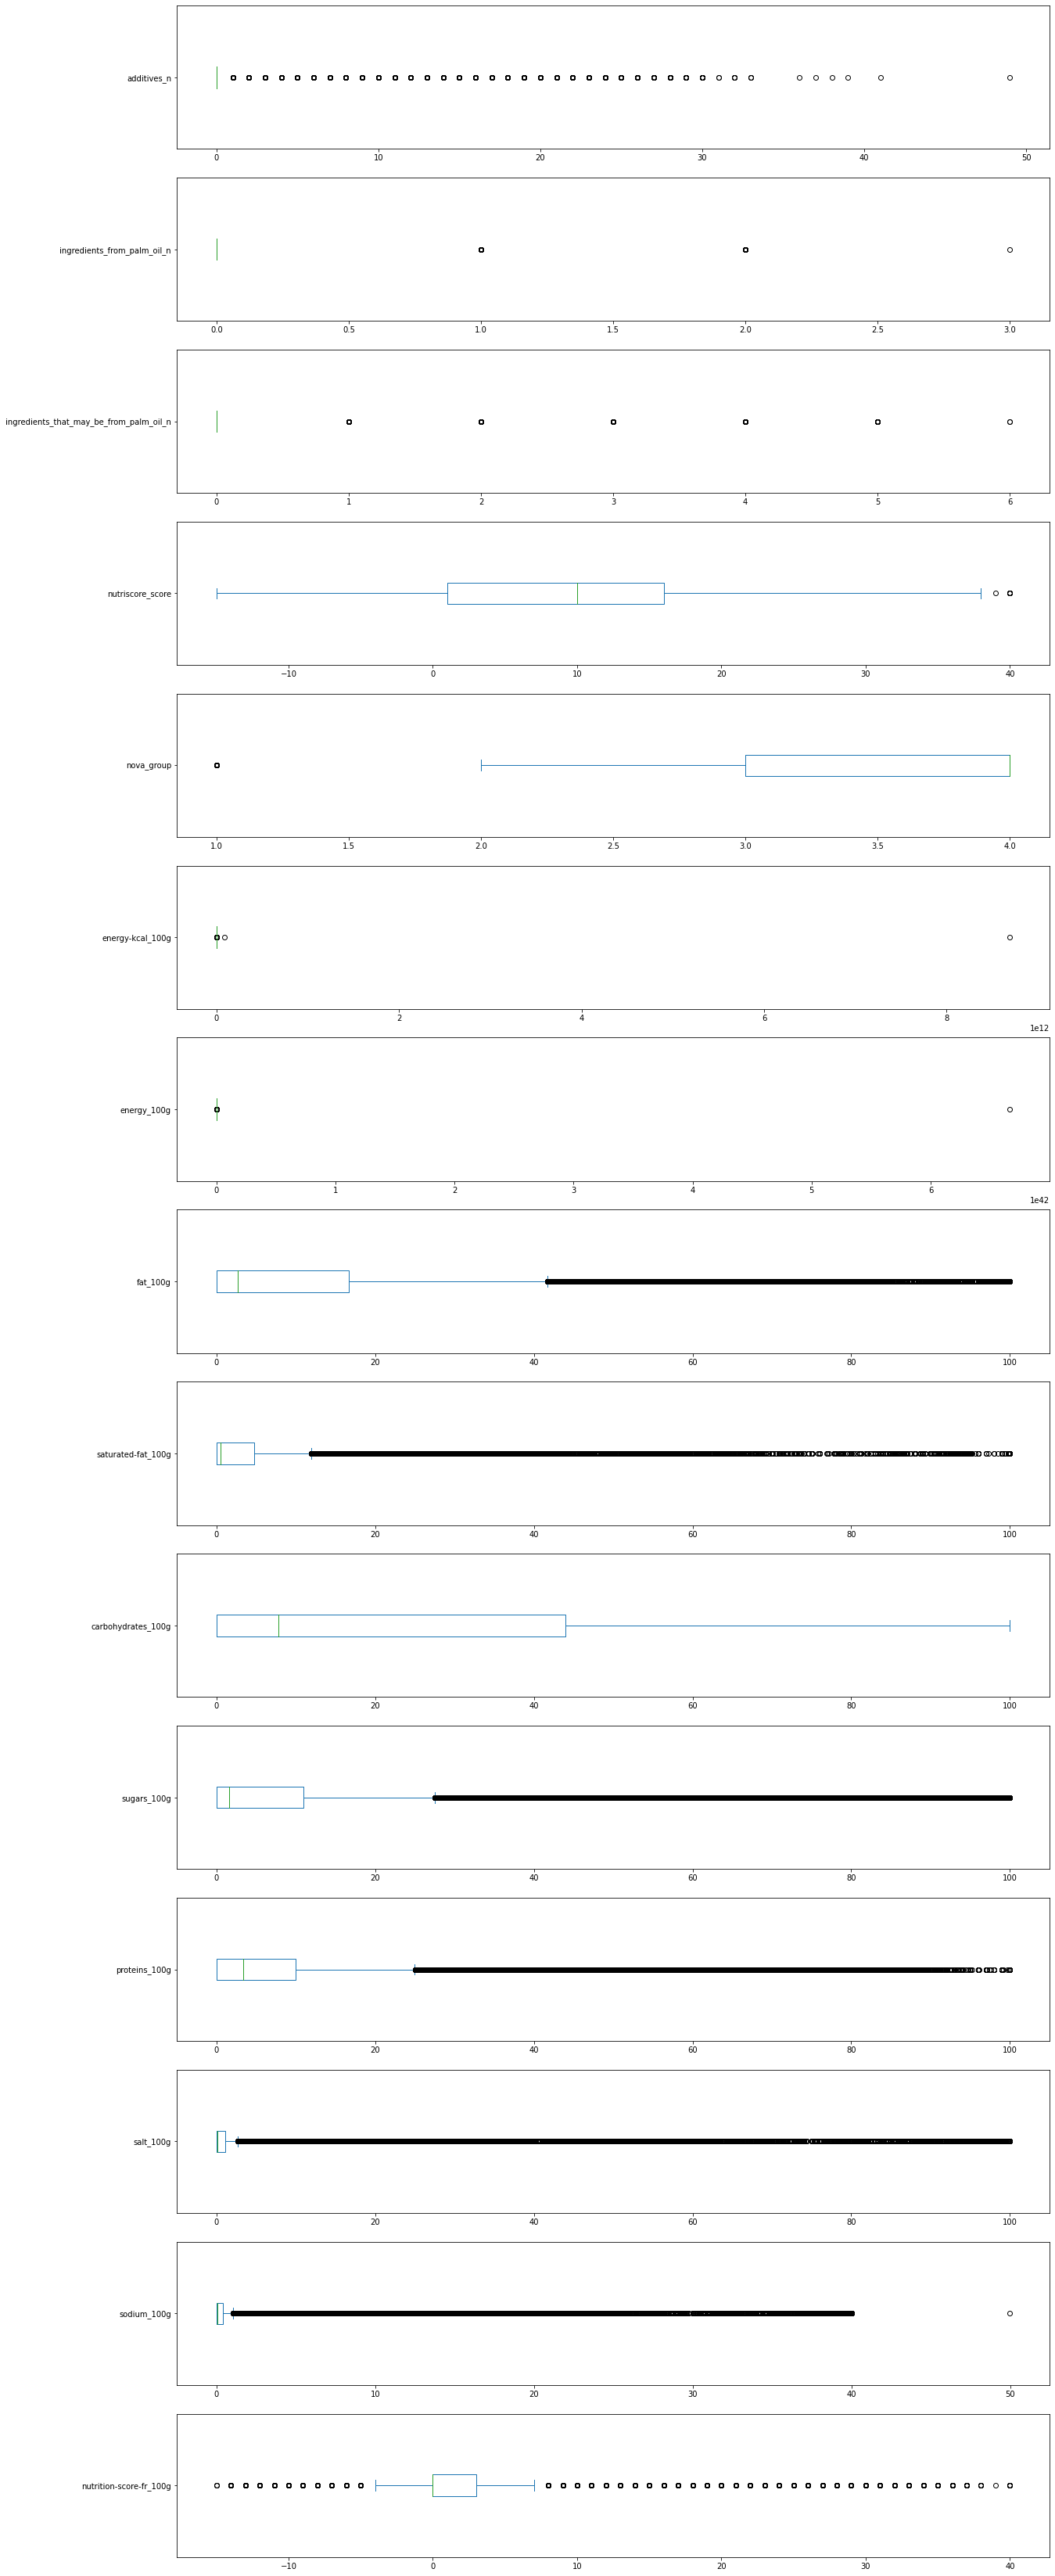

In [9]:
plotBoxes(df, df.select_dtypes('float').columns)

We see that in fact, almost all of the quantitative features have outliers, so we'll have to remove them

Also, we can see some features are in fact categorical features:
* nova_group
* ingredients_from_palm_oil_n
* ingredients_that_may_be_from_palm_oil_n

We should convert them to panda.categories for convenience

Some others are not continuous values:
* additives_n

lastly, for all the others, we can be confident to replace NaN values by number 0.0, but most of them have already been processed on previous stage

In [10]:
df['nova_group'] = df['nova_group'].astype('category')
df['ingredients_from_palm_oil_n'] = df['ingredients_from_palm_oil_n'].astype('category')
df['ingredients_that_may_be_from_palm_oil_n'] = df['ingredients_that_may_be_from_palm_oil_n'].astype('category')

In [11]:
quantis_continuous = quantis.drop(['nova_group','ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'additives_n'])
df[quantis_continuous].fillna(value=0.0, inplace=True)

Let's see graphically the distribution of the features

distribution of values


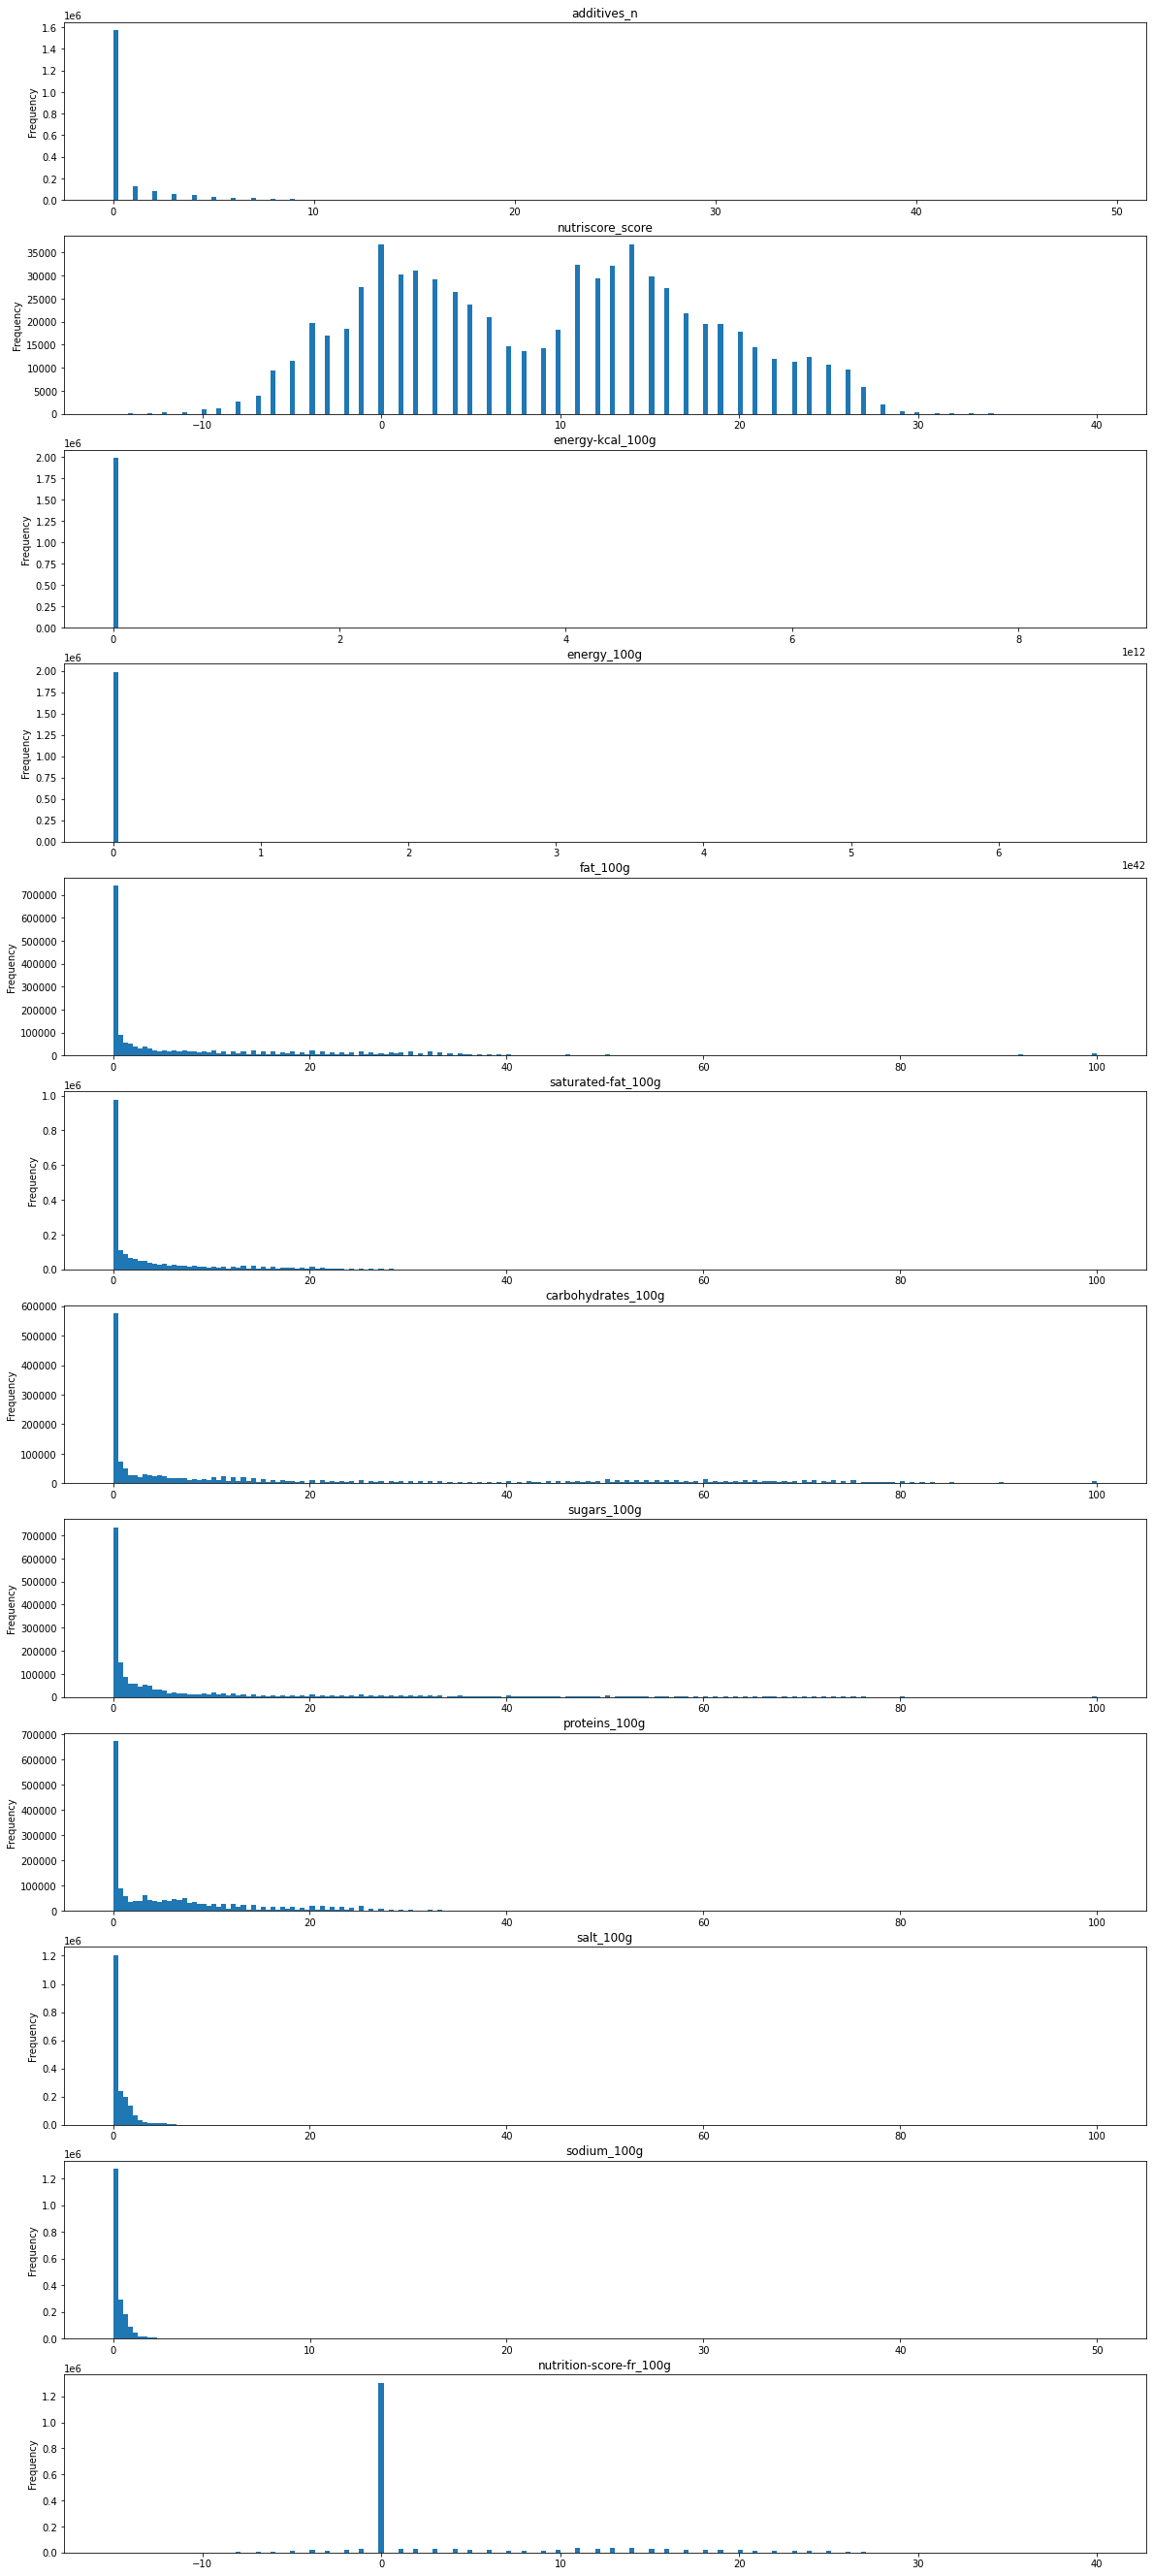

In [12]:
plotDist(df, df.select_dtypes('float').columns)

Reminder, what are the rates of missing values for these features ?

In [13]:
(df.select_dtypes('float').isna().mean().sort_values()) * 100

additives_n                0.00
energy-kcal_100g           0.00
energy_100g                0.00
fat_100g                   0.00
saturated-fat_100g         0.00
carbohydrates_100g         0.00
sugars_100g                0.00
proteins_100g              0.00
salt_100g                  0.00
sodium_100g                0.00
nutrition-score-fr_100g    0.00
nutriscore_score          63.82
dtype: float64

Let's apply our function to remove the outliers

We have implemented two methods in our custom library : Z-Score and IQ Range

Let's consider feature having outliers for the features shown in the boxplots above, so basically all of the `*_100g` except `nutrition-score-fr_100g` and `carbohydrates_100g`(has no outliers)

In [14]:
has_Outliers = df.filter(regex='_100g').drop('nutrition-score-fr_100g', axis=1).drop('carbohydrates_100g', axis=1).std()
has_Outliers.index

Index(['energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

In [15]:
removeOutliers(df, has_Outliers.index)

Now that outliers are removed, let's see the results

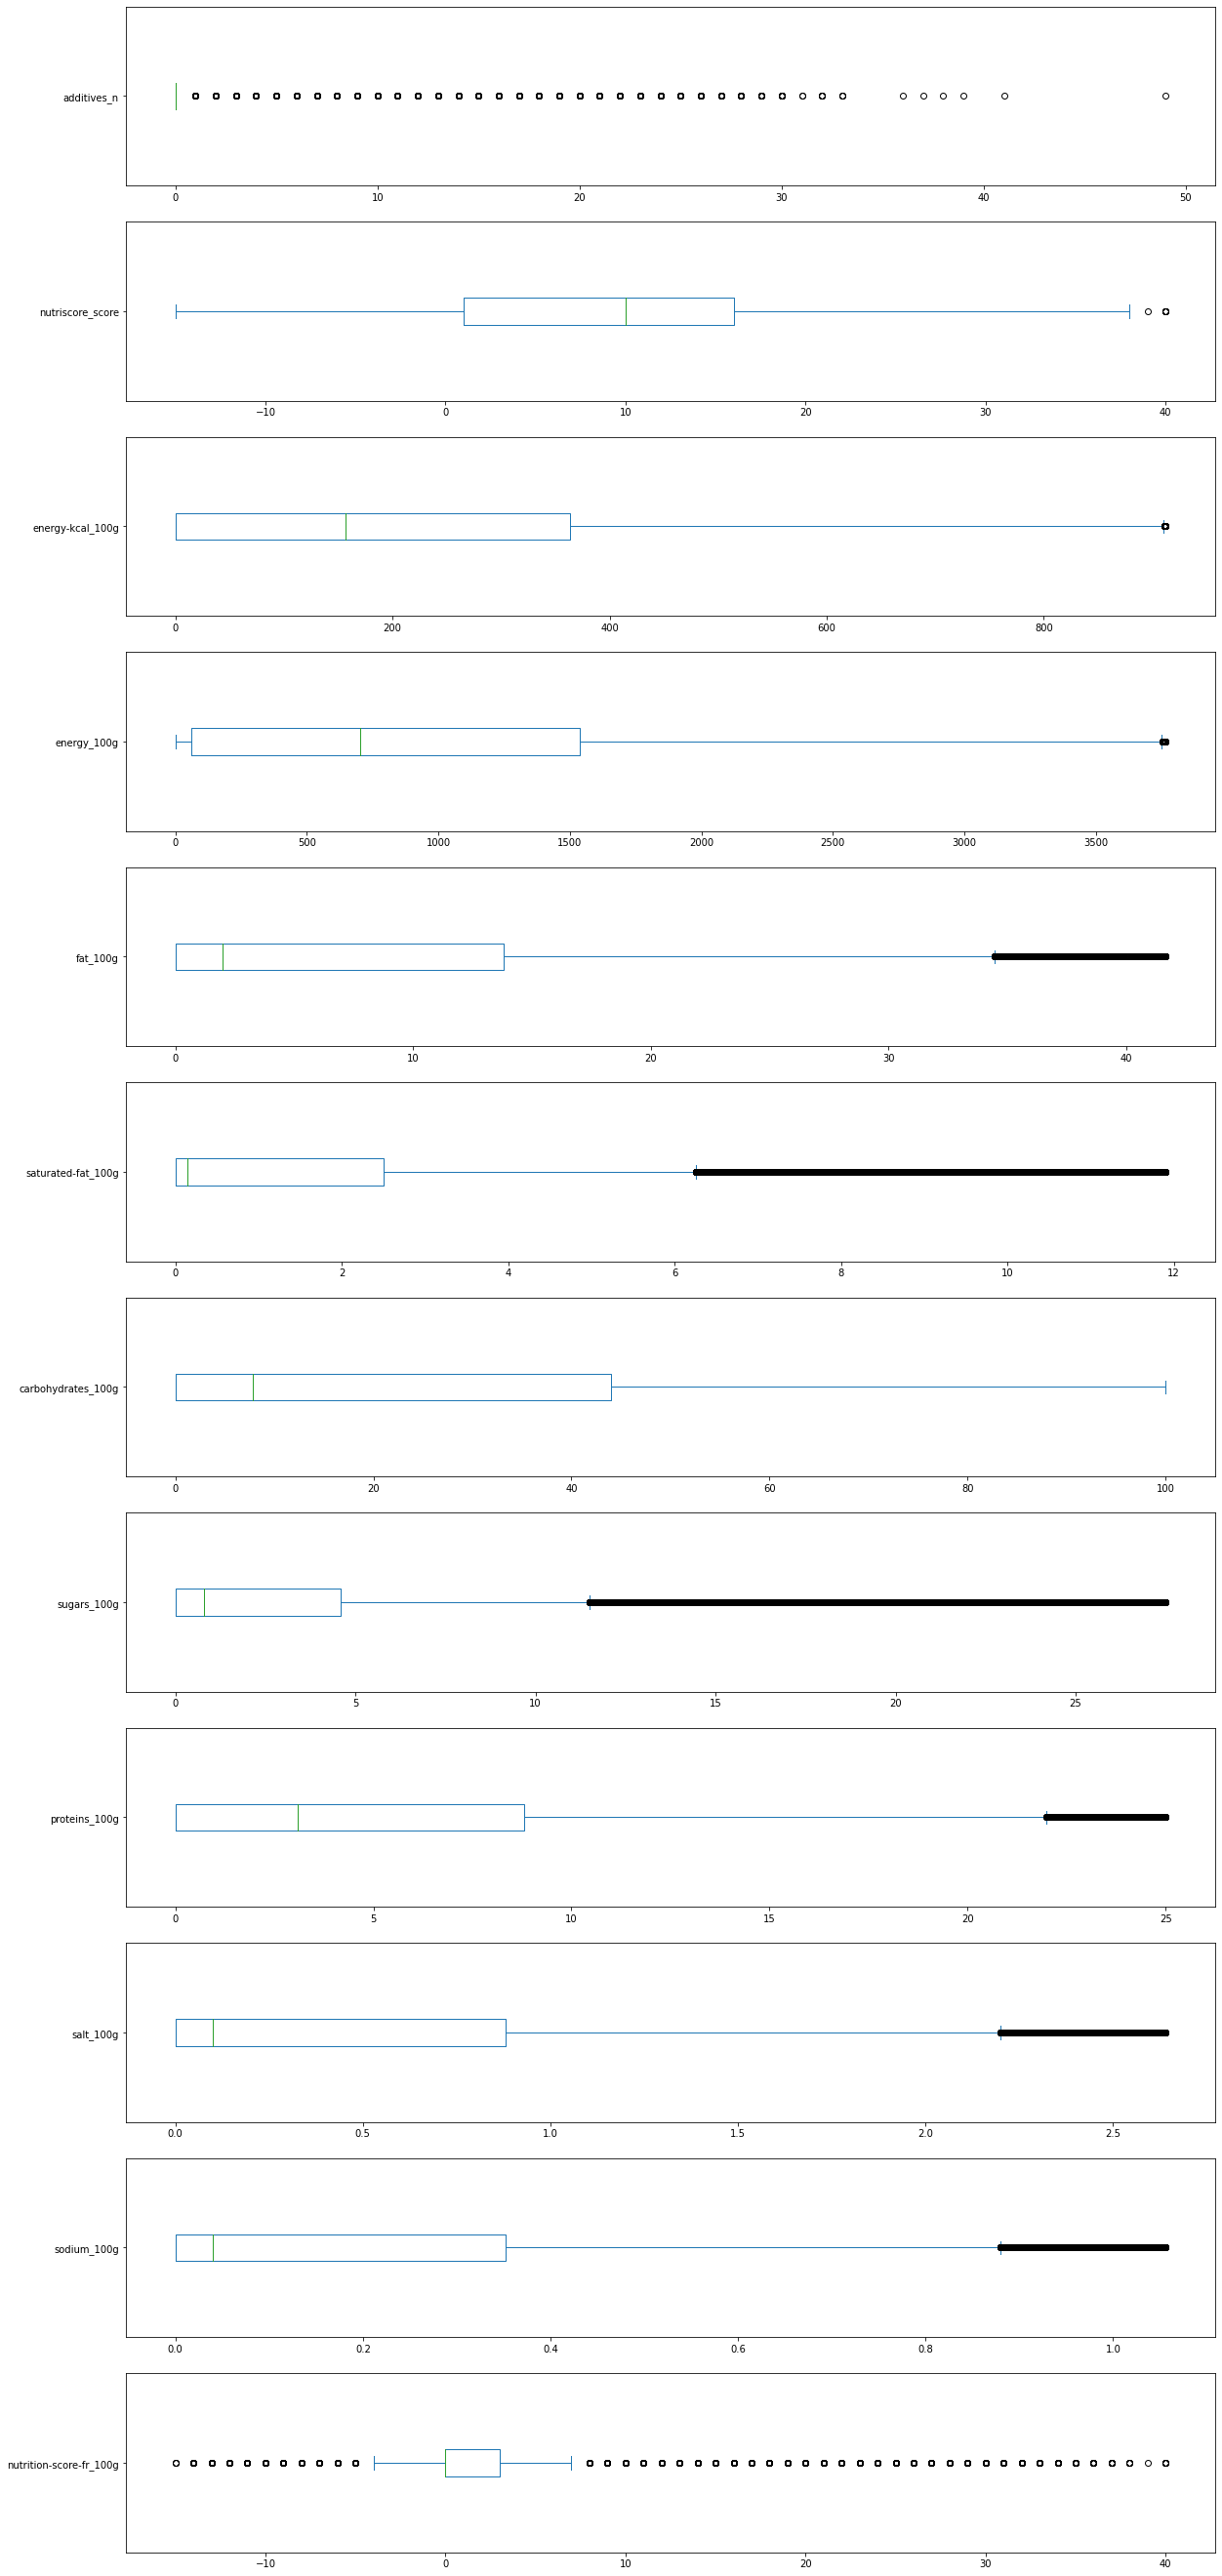

In [16]:
plotBoxes(df, df.select_dtypes('float').columns)

This is way better: check the range values.

let's see the distributions

distribution of values


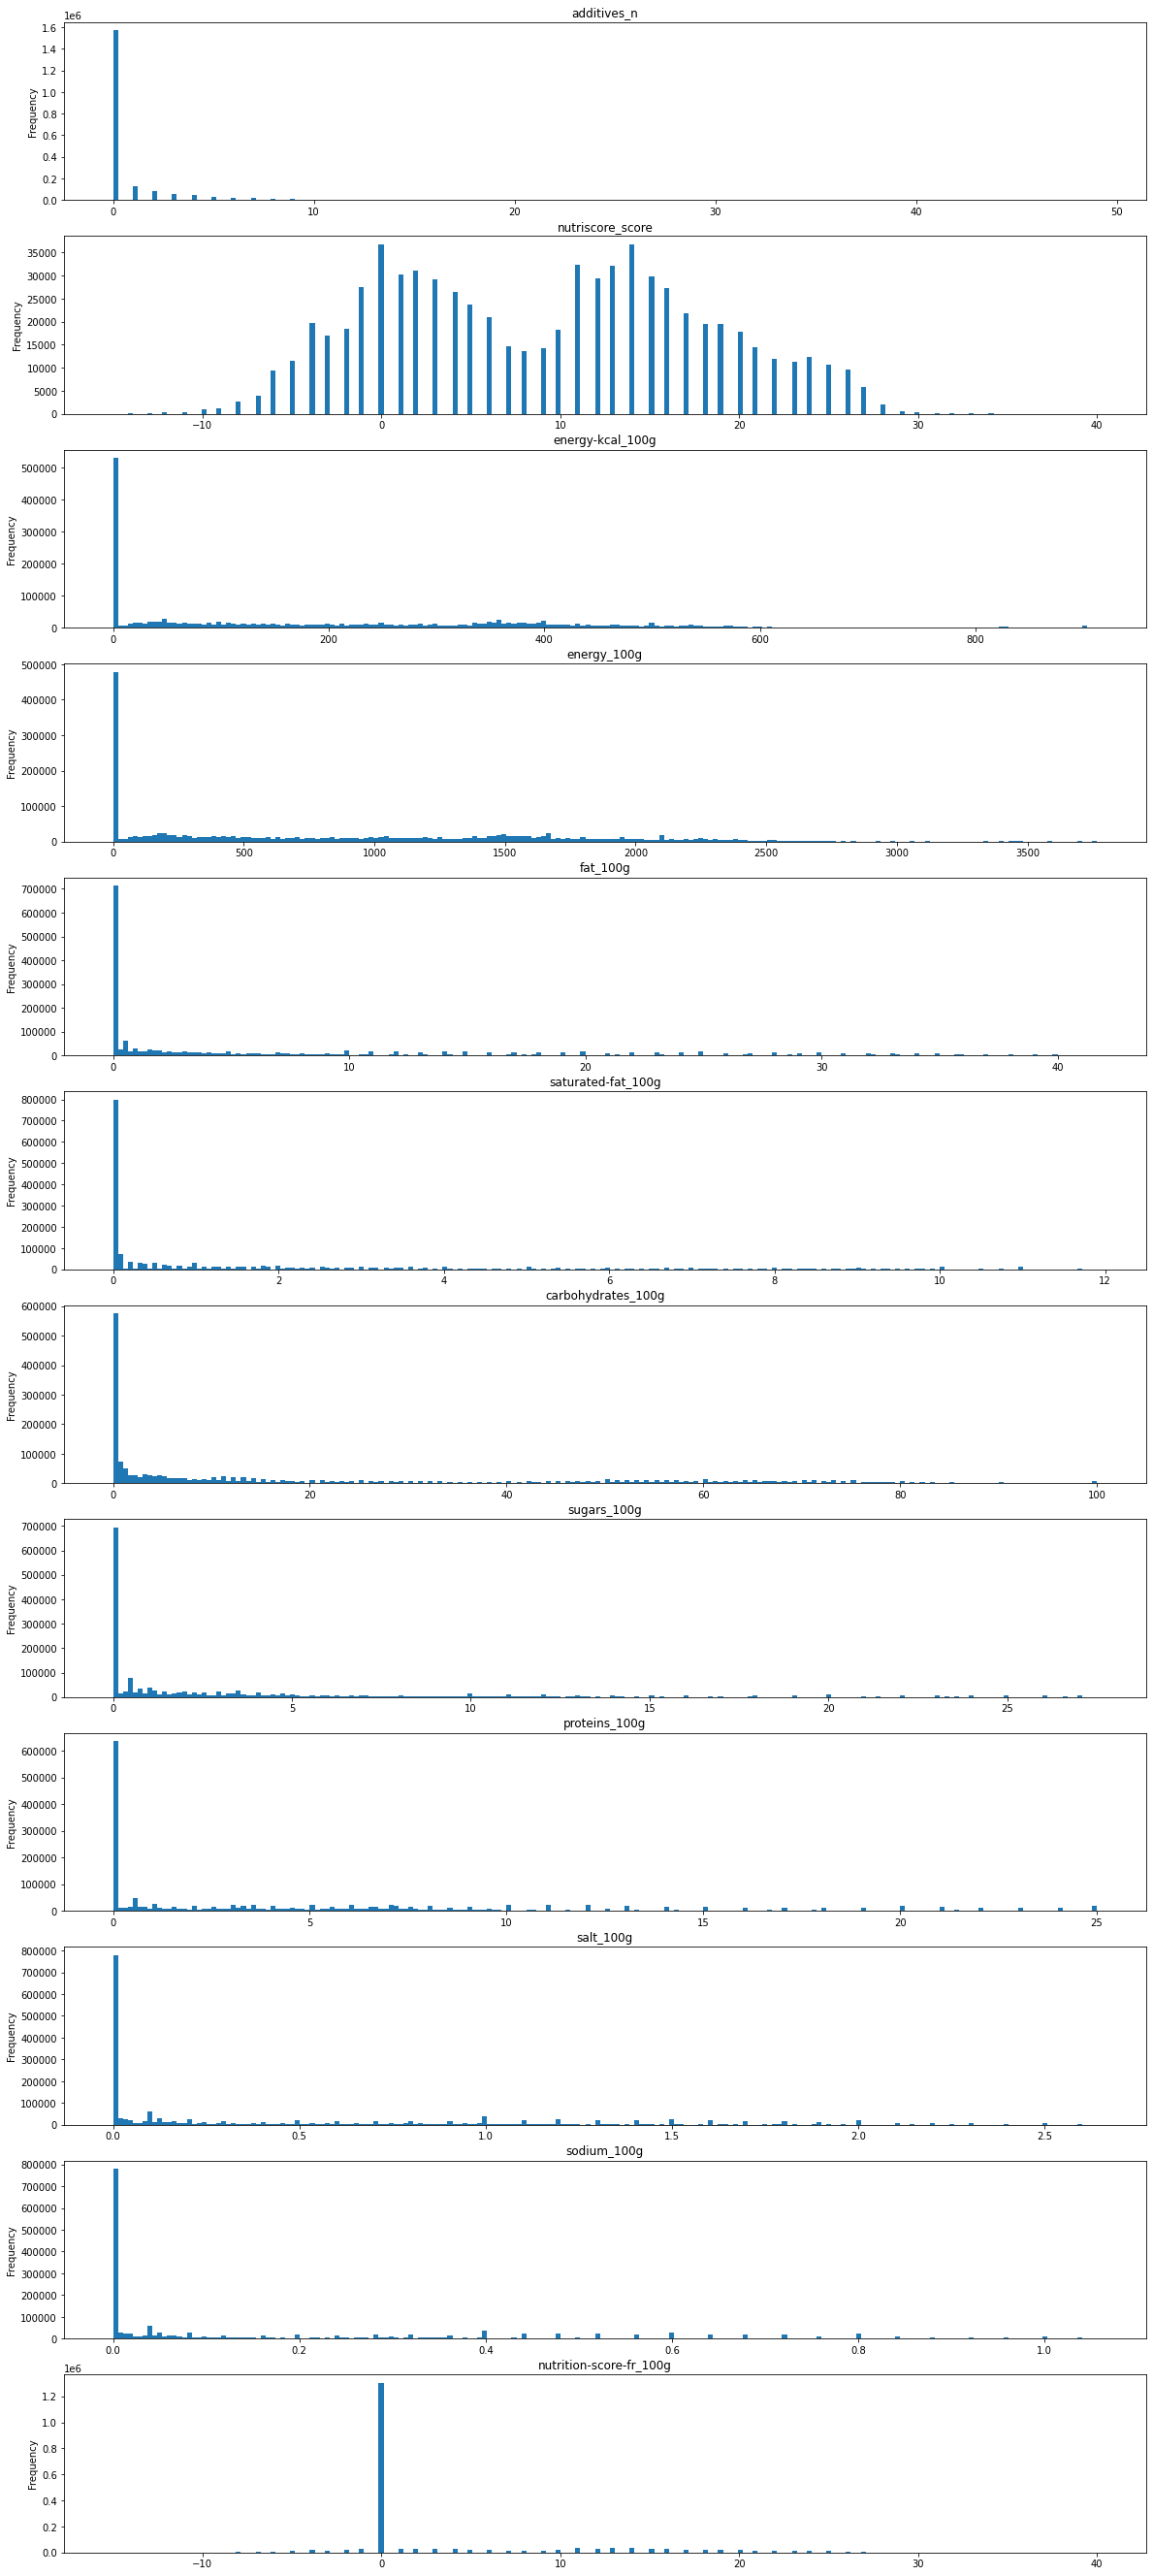

In [17]:
plotDist(df, df.select_dtypes('float').columns)

In [18]:
df.select_dtypes('float').agg(agg_func).T

,std,skew,kurtosis,mean,median,var,mad,prod,sum
additives_n,2.00,4.17,24.10,0.74,0.00,4.01,1.17,0.00,"1,465,137.00"
nutriscore_score,8.84,0.10,-0.94,9.10,10.00,78.16,7.63,-0.00,"6,541,544.00"
energy-kcal_100g,202.93,0.76,-0.15,207.32,157.00,"41,181.93",174.40,0.00,"410,634,407.38"
energy_100g,831.60,0.67,-0.40,884.77,703.00,"691,554.32",718.21,0.00,"1,746,961,011.59"
fat_100g,10.86,1.29,0.48,8.04,2.00,117.89,8.89,0.00,"15,182,834.34"
saturated-fat_100g,2.81,1.76,2.16,1.77,0.15,7.90,2.14,0.00,"3,102,651.01"
carbohydrates_100g,27.35,1.03,-0.32,22.14,7.80,748.03,23.39,0.00,"43,974,357.79"
sugars_100g,6.28,2.03,3.40,3.86,0.80,39.49,4.53,0.00,"6,599,723.18"
proteins_100g,6.71,1.23,0.55,5.56,3.10,44.96,5.40,0.00,"10,578,741.42"
salt_100g,0.66,1.29,0.59,0.48,0.10,0.44,0.55,0.00,"899,066.51"


In [19]:
df.select_dtypes('float').describe().T

,count,mean,std,min,25%,50%,75%,max
additives_n,"1,986,622.00",0.74,2.00,0.00,0.00,0.00,0.00,49.00
nutriscore_score,"718,826.00",9.10,8.84,-15.00,1.00,10.00,16.00,40.00
energy-kcal_100g,"1,980,700.00",207.32,202.93,0.00,0.00,157.00,364.00,912.28
energy_100g,"1,974,484.00",884.77,831.60,0.00,59.00,703.00,"1,536.00","3,765.00"
fat_100g,"1,889,250.00",8.04,10.86,0.00,0.00,2.00,13.79,41.67
saturated-fat_100g,"1,749,596.00",1.77,2.81,0.00,0.00,0.15,2.50,11.90
carbohydrates_100g,"1,986,622.00",22.14,27.35,0.00,0.00,7.80,44.00,100.00
sugars_100g,"1,710,107.00",3.86,6.28,0.00,0.00,0.80,4.60,27.50
proteins_100g,"1,903,302.00",5.56,6.71,0.00,0.00,3.10,8.80,25.00
salt_100g,"1,858,895.00",0.48,0.66,0.00,0.00,0.10,0.88,2.64


Now the figures are more consistent

In [20]:
# df.to_csv("./tmp/df_02_quanti.csv")
df.to_pickle("./tmp/df_02_quanti.gzip")